In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.model_selection import train_test_split

### Data Collection and processing

In [16]:
breast_cancer_dataset = sklearn.datasets.load_breast_cancer()

In [17]:
breast_cancer_dataset

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [18]:
# Loading the data to pandas dataframe
df = pd.DataFrame(breast_cancer_dataset.data,
                  columns=breast_cancer_dataset.feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [19]:
df['label'] = breast_cancer_dataset.target

In [20]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'label'],
      dtype='object')

In [21]:
df.shape

(569, 31)

In [22]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [23]:
df['label'].value_counts()

label
1    357
0    212
Name: count, dtype: int64

0 --> Malignant


1 --> Benign


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [25]:
# CHecking for missing values
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
label                      0
dtype: int64

In [26]:
df.groupby('label').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
label,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


In [27]:
# Splitting into feature and target
X = df.drop('label', axis = 1)
Y = df['label']

In [28]:
print(X)
print(Y)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

In [29]:
# Splitting the data into train and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, 
                                                   random_state=2)

In [30]:
print(X_train.shape, X_test.shape, X.shape)

(455, 30) (114, 30) (569, 30)


In [41]:
# Standardizing the data
from sklearn.preprocessing import StandardScaler

In [42]:
scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [44]:
X_train_std, X_test_std

(array([[-0.01330339,  1.7757658 , -0.01491962, ..., -0.13236958,
         -1.08014517, -0.03527943],
        [-0.8448276 , -0.6284278 , -0.87702746, ..., -1.11552632,
         -0.85773964, -0.72098905],
        [ 1.44755936,  0.71180168,  1.47428816, ...,  0.87583964,
          0.4967602 ,  0.46321706],
        ...,
        [-0.46608541, -1.49375484, -0.53234924, ..., -1.32388956,
         -1.02997851, -0.75145272],
        [-0.50025764, -1.62161319, -0.527814  , ..., -0.0987626 ,
          0.35796577, -0.43906159],
        [ 0.96060511,  1.21181916,  1.00427242, ...,  0.8956983 ,
         -1.23064515,  0.50697397]]),
 array([[-0.04462793, -1.41612656, -0.05903514, ..., -0.18278004,
         -1.23064515, -0.6268286 ],
        [ 0.24583601, -0.06219797,  0.21802678, ...,  0.54129749,
          0.11047691,  0.0483572 ],
        [-1.26115925, -0.29051645, -1.26499659, ..., -1.35138617,
          0.269338  , -0.28231213],
        ...,
        [ 0.72709489,  0.45836817,  0.75277276, ...,  

### Building Neural Network Model

In [32]:
# Importing tensorflow and keras
import tensorflow as tf

In [33]:
tf.random.set_seed(3)
from tensorflow import keras

In [36]:
# Setting up layer for neural network

model = keras.Sequential([
    keras.layers.Flatten(input_shape = (30,)),
    keras.layers.Dense(20, activation = 'relu'),
    keras.layers.Dense(2, activation = 'sigmoid')
])

In [37]:
# COmpiling the neural network

model.compile(optimizer='adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

In [45]:
# training the neural network

history = model.fit(X_train_std, Y_train, validation_split = 0.1, epochs = 10)

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7113 - loss: 0.5761 - val_accuracy: 0.8913 - val_loss: 0.3343
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8987 - loss: 0.2667 - val_accuracy: 0.9130 - val_loss: 0.2362
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9431 - loss: 0.1755 - val_accuracy: 0.9348 - val_loss: 0.1916
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9512 - loss: 0.1384 - val_accuracy: 0.9565 - val_loss: 0.1662
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9588 - loss: 0.1175 - val_accuracy: 0.9565 - val_loss: 0.1492
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9725 - loss: 0.1037 - val_accuracy: 0.9565 - val_loss: 0.1370
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9799 - loss: 0.0936 - val_accuracy: 0.9348 - val_loss: 0.1280
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9817 - loss: 0.0858 - val_accuracy: 0.9348 - val_loss:

### Visualizing accuracy and loss

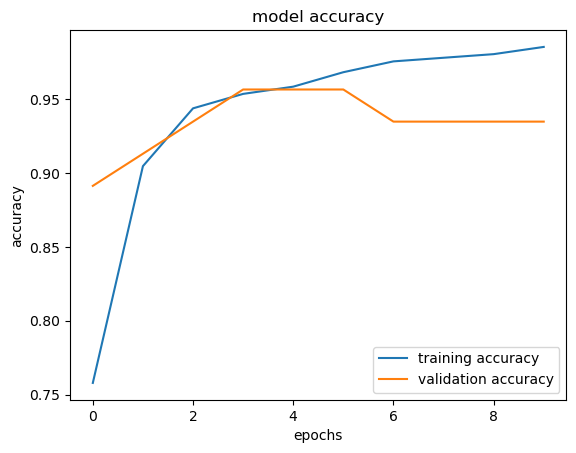

In [47]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel("epochs")

plt.legend(['training accuracy','validation accuracy'], loc = 'lower right')

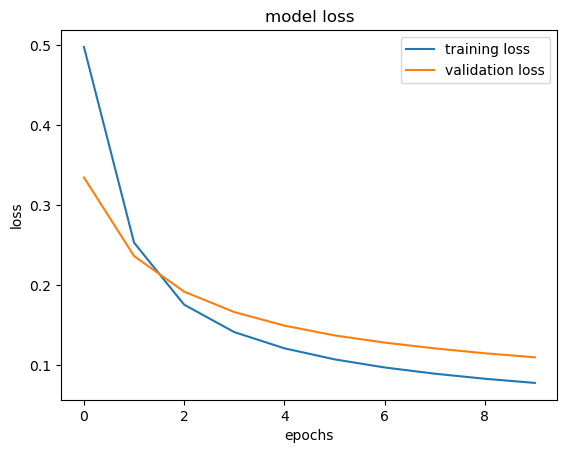

In [49]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel("epochs")

plt.legend(['training loss','validation loss'], loc = 'upper right')

In [51]:
# Accuracy on test data
loss, accuracy = model.evaluate(X_test_std, Y_test)
print("test accuracy-->", accuracy)
print("test loss-->", loss)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9676 - loss: 0.0984 
test accuracy--> 0.9736841917037964
test loss--> 0.09169164299964905


In [52]:
X_test_std[0]

array([-0.04462793, -1.41612656, -0.05903514, -0.16234067,  2.0202457 ,
       -0.11323672,  0.18500609,  0.47102419,  0.63336386,  0.26335737,
        0.53209124,  2.62763999,  0.62351167,  0.11405261,  1.01246781,
        0.41126289,  0.63848593,  2.88971815, -0.41675911,  0.74270853,
       -0.32983699, -1.67435595, -0.36854552, -0.38767294,  0.32655007,
       -0.74858917, -0.54689089, -0.18278004, -1.23064515, -0.6268286 ])

In [53]:
Y_pred = model.predict(X_test_std)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step 


In [54]:
print(Y_pred.shape)
Y_pred[0]

(114, 2)


array([0.1354395, 0.2728463], dtype=float32)

In [58]:
Y_pred

array([[1.3543950e-01, 2.7284631e-01],
       [3.1155238e-01, 2.6797155e-01],
       [9.5569985e-03, 9.2492783e-01],
       [9.3175101e-01, 4.3463288e-07],
       [1.9559069e-01, 4.9800435e-01],
       [8.5952944e-01, 1.0121464e-04],
       [1.5589292e-01, 6.4986277e-01],
       [4.6426747e-03, 7.9591358e-01],
       [3.2765035e-02, 7.0687914e-01],
       [1.6631534e-02, 6.5052938e-01],
       [3.0212373e-01, 2.1691246e-01],
       [5.5462483e-02, 7.5506747e-01],
       [1.2177815e-01, 3.4809536e-01],
       [1.3827755e-01, 5.5323327e-01],
       [1.5245980e-02, 8.5054171e-01],
       [6.7850029e-01, 7.7846943e-04],
       [1.0184391e-02, 8.7664700e-01],
       [3.7424583e-02, 7.7981186e-01],
       [1.2815264e-02, 6.1587691e-01],
       [8.7055314e-01, 2.4649994e-03],
       [5.8132429e-03, 9.5341808e-01],
       [1.0187790e-02, 8.4938622e-01],
       [2.7227677e-02, 7.5113213e-01],
       [4.3424186e-03, 7.2268867e-01],
       [7.6756634e-02, 5.7642114e-01],
       [6.9083512e-01, 9.

**model.predict()** gives the prediction probability of each class for the data point

In [59]:
# Converting the prediction probability to class label

Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0]


### Building the preedictive system

In [64]:
input_data = (11.76,21.6,74.72,427.9,0.08637,0.04966,0.01657,0.01115,0.1495,0.05888,
              0.4062,1.21,2.635,28.47,0.005857,0.009758,0.01168,0.007445,0.02406,0.001769,
              12.98,25.72,82.98,516.5,0.1085,0.08615,0.05523,0.03715,0.2433,0.06563)

# CHange input data to numpy array
input_data_numpy = np.asarray(input_data)

# reshape the numpy array
input_data_reshape = input_data_numpy.reshape(1,-1)

# Standardize the data
input_data_std = scaler.transform(input_data_reshape)

prediction = model.predict(input_data_std)

print(prediction)

prediction_label = [np.argmax(prediction)]

print(prediction_label)

if prediction_label[0] == 0:
    print("The tumor is Malignant")
else:
    print("The tumor is Benign")
    

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
[[0.00644698 0.82245016]]
[1]
The tumor is Benign


C:\Users\subit\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [67]:
s = 'coder'

print(s[::0])

ValueError: slice step cannot be zero